# 日経平均株価 日足

In [23]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

symbol = '^N225'
ticker = yf.Ticker(symbol)

df = ticker.history(period='1y', start='2024-01-01', end='2024-12-31') # All data in 2024
#df = ticker.history(period='1y')  # All data in 2024
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-04 00:00:00+09:00,33193.050781,33299.390625,32693.179688,33288.289062,117300000,0.0,0.0
2024-01-05 00:00:00+09:00,33397.519531,33568.039062,33257.429688,33377.421875,115300000,0.0,0.0
2024-01-09 00:00:00+09:00,33704.828125,33990.281250,33600.320312,33763.179688,112100000,0.0,0.0
2024-01-10 00:00:00+09:00,33896.328125,34539.019531,33885.738281,34441.718750,106000000,0.0,0.0
2024-01-11 00:00:00+09:00,34871.328125,35157.558594,34849.570312,35049.859375,130100000,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-24 00:00:00+09:00,39210.230469,39245.750000,38995.761719,39036.851562,116200000,0.0,0.0
2024-12-25 00:00:00+09:00,39168.519531,39180.589844,38927.160156,39130.429688,116100000,0.0,0.0
2024-12-26 00:00:00+09:00,39129.308594,39592.281250,39110.921875,39568.058594,131400000,0.0,0.0


In [24]:
df0 = ticker.history(period='2y')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-30 00:00:00+09:00,27384.769531,27486.419922,27337.250000,27433.400391,65800000,0.0,0.0
2023-01-31 00:00:00+09:00,27458.560547,27494.169922,27302.220703,27327.109375,74600000,0.0,0.0
2023-02-01 00:00:00+09:00,27483.410156,27547.669922,27322.789062,27346.880859,65800000,0.0,0.0
2023-02-02 00:00:00+09:00,27453.669922,27472.439453,27338.429688,27402.050781,73200000,0.0,0.0
2023-02-03 00:00:00+09:00,27455.029297,27612.570312,27445.689453,27509.460938,92800000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-21 00:00:00+09:00,39163.531250,39238.210938,38643.839844,39027.980469,93300000,0.0,0.0
2025-01-22 00:00:00+09:00,39355.218750,39694.570312,39332.628906,39646.250000,108500000,0.0,0.0
2025-01-23 00:00:00+09:00,39810.058594,40036.070312,39677.218750,39958.871094,119100000,0.0,0.0


## 日足チャートと Bollinger's bands

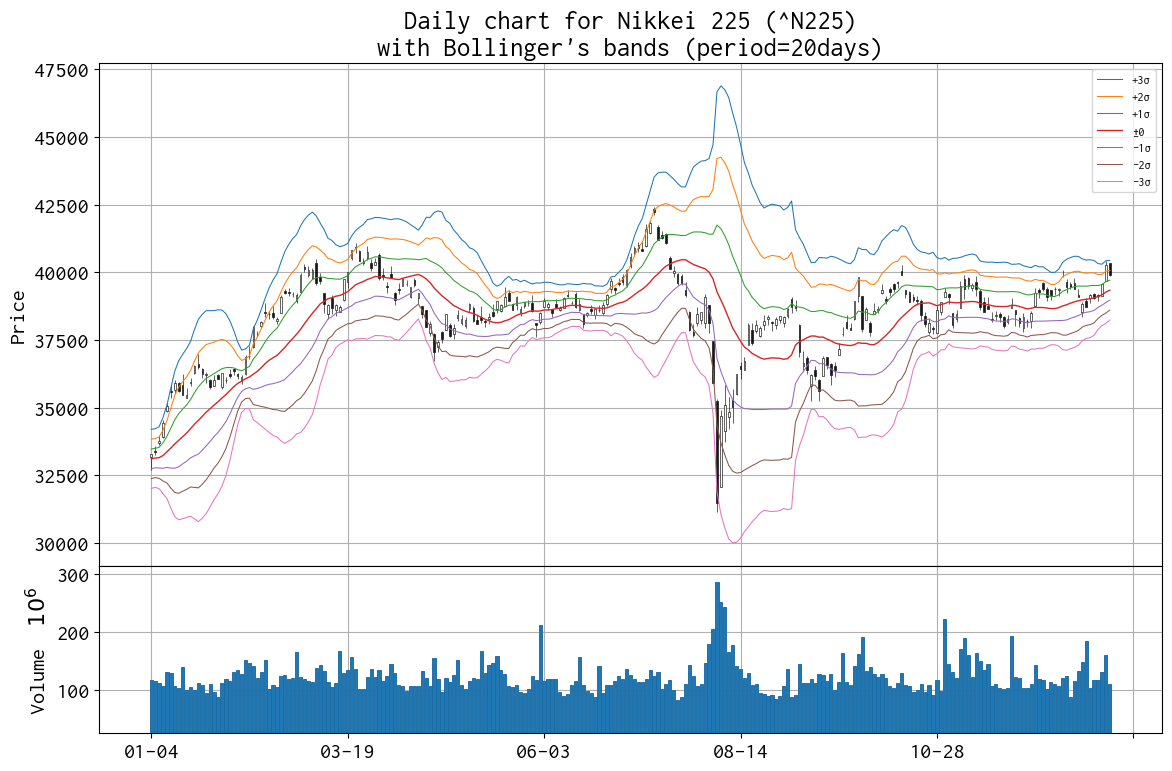

In [25]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

# Bollinger bands
period = 20
r = df0['Close'].rolling(period)    
band_upper3 = r.mean() + 3 * r.std()
band_upper2 = r.mean() + 2 * r.std()
band_upper1 = r.mean() + 1 * r.std()
band_mean = r.mean()
band_lower1 = r.mean() - 1 * r.std()
band_lower2 = r.mean() - 2 * r.std()
band_lower3 = r.mean() - 3 * r.std()

apds  = [
    mpf.make_addplot(band_upper3[df.index], width=0.75, label='+3σ', ax=ax[0]),
    mpf.make_addplot(band_upper2[df.index], width=0.75, label='+2σ', ax=ax[0]),
    mpf.make_addplot(band_upper1[df.index], width=0.75, label='+1σ', ax=ax[0]),
    mpf.make_addplot(band_mean[df.index], width=1, label='±0', ax=ax[0]),
    mpf.make_addplot(band_lower1[df.index], width=0.75, label='-1σ', ax=ax[0]),
    mpf.make_addplot(band_lower2[df.index], width=0.75, label='-2σ', ax=ax[0]),
    mpf.make_addplot(band_lower3[df.index], width=0.75, label='-3σ', ax=ax[0]),
]   

mpf.plot(
    df,
    type='candle',
    style='default',
    volume=ax[1],
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)

try:
    ax[0].set_title('Daily chart for %s (%s)\nwith Bollinger\'s bands (period=20days)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Daily chart for %s\nwith Bollinger\'s bands (period=20days)' % symbol)

ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('daily_chart_bollinger_n225.png')
plt.show()

In [26]:
len(df)

245

In [27]:
df.tail(2)['Close']

Date
2024-12-27 00:00:00+09:00    40281.160156
2024-12-30 00:00:00+09:00    39894.539062
Name: Close, dtype: float64

In [28]:
df.tail(2)['Close'].diff()

Date
2024-12-27 00:00:00+09:00           NaN
2024-12-30 00:00:00+09:00   -386.621094
Name: Close, dtype: float64

In [29]:
df['Close'].rolling(25).mean()

Date
2024-01-04 00:00:00+09:00             NaN
2024-01-05 00:00:00+09:00             NaN
2024-01-09 00:00:00+09:00             NaN
2024-01-10 00:00:00+09:00             NaN
2024-01-11 00:00:00+09:00             NaN
                                 ...     
2024-12-24 00:00:00+09:00    38917.561719
2024-12-25 00:00:00+09:00    38948.685312
2024-12-26 00:00:00+09:00    39010.360781
2024-12-27 00:00:00+09:00    39090.253125
2024-12-30 00:00:00+09:00    39134.829063
Name: Close, Length: 245, dtype: float64

In [30]:
df['Close'].rolling(75).mean()

Date
2024-01-04 00:00:00+09:00             NaN
2024-01-05 00:00:00+09:00             NaN
2024-01-09 00:00:00+09:00             NaN
2024-01-10 00:00:00+09:00             NaN
2024-01-11 00:00:00+09:00             NaN
                                 ...     
2024-12-24 00:00:00+09:00    38509.935104
2024-12-25 00:00:00+09:00    38542.912969
2024-12-26 00:00:00+09:00    38585.267500
2024-12-27 00:00:00+09:00    38639.472969
2024-12-30 00:00:00+09:00    38689.278021
Name: Close, Length: 245, dtype: float64

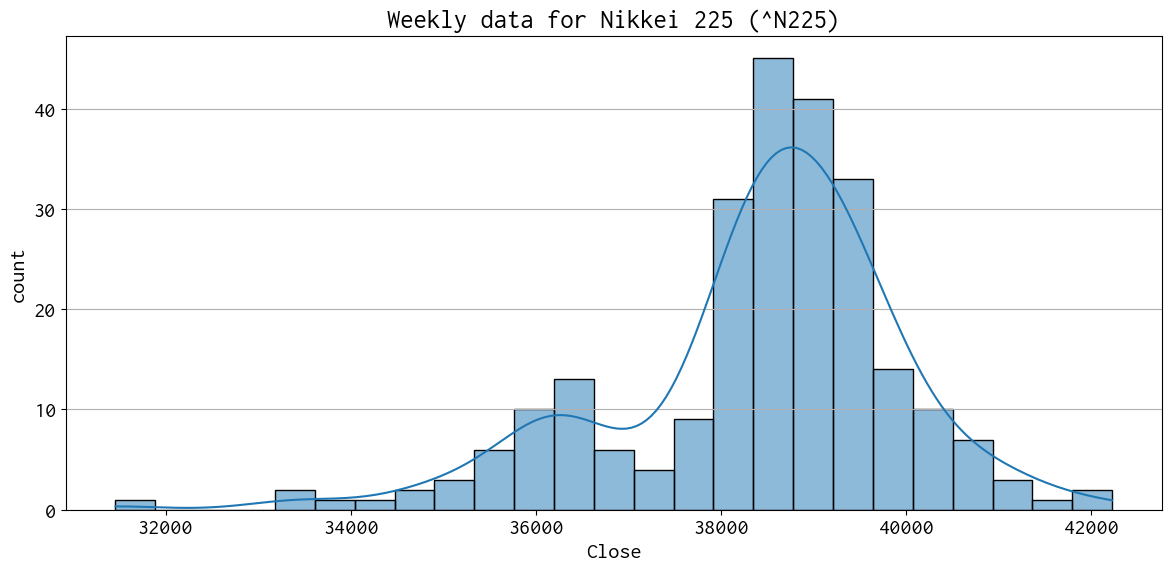

In [43]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('daily_histogram_n225.png')
plt.show()

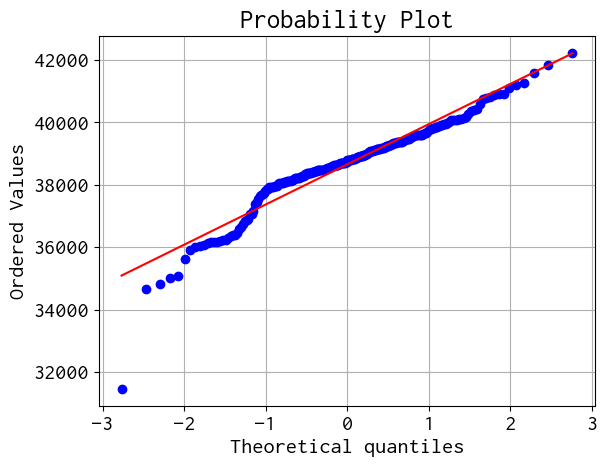

In [10]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()
plt.show()

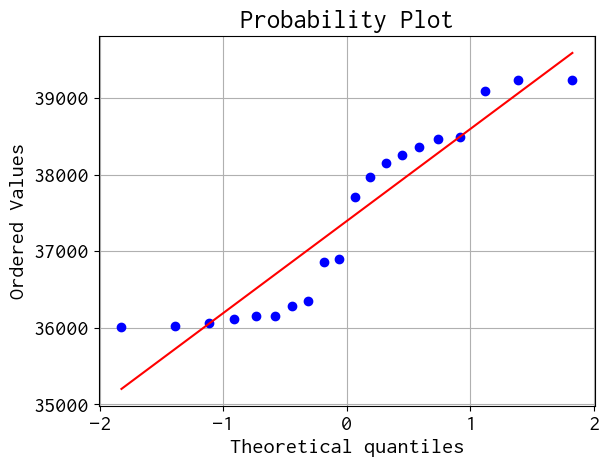

In [11]:
# Q-Qプロットの描画
stats.probplot(df.iloc[0:20]['Close'], dist="norm", plot=plt)
plt.grid()
plt.show()

In [12]:
len(df)

244

In [13]:
stat, pval = stats.shapiro(df['Close'])
print('Shapiro-Wilk test statistic: %.3f, p-value: %.3f' % (stat, pval))

Shapiro-Wilk test statistic: 0.932, p-value: 0.000


In [14]:
stat, pval = stats.shapiro(df.iloc[0:20]['Close'])
print('Shapiro-Wilk test statistic: %.3f, p-value: %.3f' % (stat, pval))

Shapiro-Wilk test statistic: 0.863, p-value: 0.009


In [15]:
res = stats.anderson(df['Close'])

In [16]:
print('%.3f' % res.statistic)

4.604


In [17]:
print(res.critical_values)

[0.567 0.646 0.775 0.904 1.075]


In [18]:
print(res.significance_level)

[15.  10.   5.   2.5  1. ]


In [19]:
res = stats.anderson(df.iloc[0:20]['Close'])

In [20]:
print('%.3f' % res.statistic)

1.021


In [21]:
print(res.critical_values)

[0.506 0.577 0.692 0.807 0.96 ]


In [22]:
print(res.significance_level)

[15.  10.   5.   2.5  1. ]
